/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


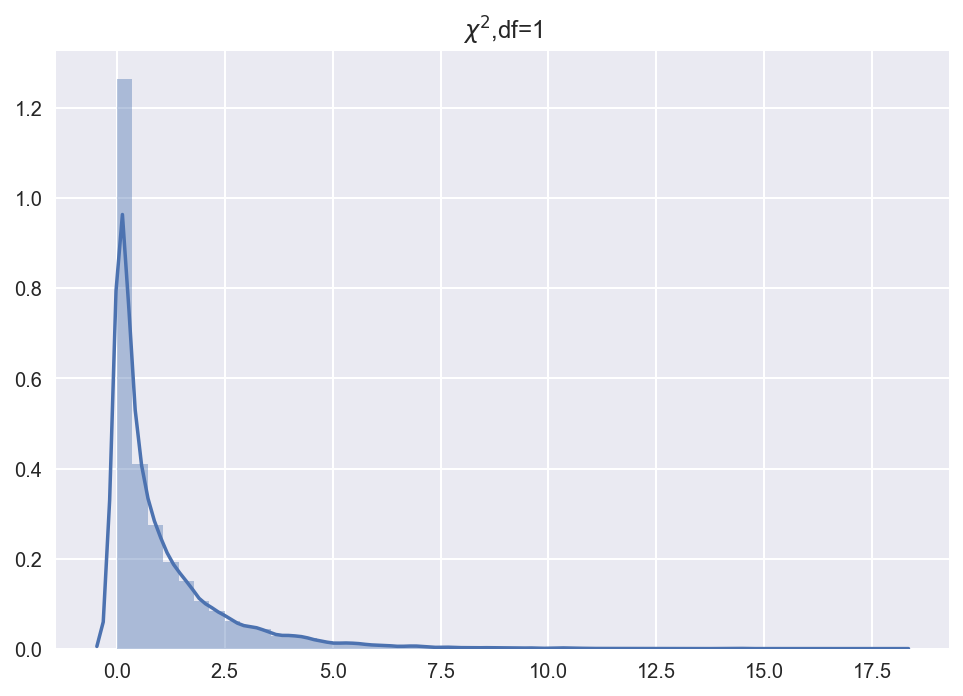

In [3]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


samples = stats.chi2.rvs(size=10000, df=1)
sns.distplot(samples)
plt.title('$\chi^2$,df=1')
plt.show()

In [4]:
from scipy import stats


stats.chi2.pdf(152.15, df=1)

2.956796099836173e-35

得到：$2.956796099836173e-35$，确实是一个几乎为 $0$ 的数。这说明了什么呢？

In [5]:
from scipy import stats
from scipy.stats import chi2_contingency


def custom_chi2_contingency(observed):
    """
    自己编写的卡方检验的函数，返回
    """
    # 每一行求和
    row = observed.sum(axis=1)
    # 每一列求和
    col = observed.sum(axis=0)
    # 总数求和
    all_sum = observed.sum()

    # meshgrid 生成网格
    x1, x2 = np.meshgrid(col, row)
    # 期望频数
    expected_count = x1 * x2 / all_sum
    # 统计量，即卡方值
    chi2 = ((observed - expected_count)**2 / expected_count).sum()
    # 自由度
    df = (len(row) - 1) * (len(col) - 1)
    # 计算 p 值，这里用到了卡方分布的概率积累函数，
    # 因为这个 cdf 是计算从左边到这点的累计积分，因此用 1 减它
    p = 1 - stats.chi2.cdf(chi2, df=df)
    return chi2, p, df, expected_count

下面验证我们编写的卡方检验函数的正确性：

In [6]:
obs = np.array([[178, 272], [38, 502]])
result1 = custom_chi2_contingency(obs)
result2 = chi2_contingency(obs)
print('自定义卡方检验的函数返回：')
print(result1)
print()
print('scipy 提供的卡方检验返回：')
print(result2)

自定义卡方检验的函数返回：
(152.16271892047084, 0.0, 1, array([[ 98.18181818, 351.81818182],
       [117.81818182, 422.18181818]]))

scipy 提供的卡方检验返回：
(150.2623232486362, 1.5192261812214016e-34, 1, array([[ 98.18181818, 351.81818182],
       [117.81818182, 422.18181818]]))
